In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
 
# List of filenames containing total DOS data
plt.figure(figsize=(100, 60))
mpl.rcParams['axes.linewidth'] = 2.5
mpl.rcParams['axes.labelsize'] = 140
mpl.rcParams['axes.titlepad'] = 90
mpl.rcParams['axes.titlesize'] = 90
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 10
mpl.rcParams['xtick.major.size'] = 25
mpl.rcParams['ytick.major.width'] = 10
mpl.rcParams['ytick.major.size'] = 25
mpl.rcParams['xtick.labelsize'] = 190  # Adjust the fontsize value as needed
mpl.rcParams['ytick.labelsize'] = 190
mpl.rcParams['axes.linewidth'] = 10
 
# Read data from projected_dos.dat file

#path = "/Users/swastika/Documents/research/LU-projects/argyrodites_mech/phonon/lpsi/hseo6_ts_121_sc/correct/phonopy/output/projected_dos.dat"
data = np.loadtxt("/Users/swastika/Documents/research/LU-projects/argyrodites_mech/phonon/lpsi/hseo6_121_sc/121/phonopy/output/projected_dos.dat")

# Define atom type groups (indices of columns for each atom type)

atom_groups = {
    'Li': list(range(1, 24)),
    'P': list(range(25, 28)),
    'S@PS$_4$': list(range(29,44)),
    'S$_{4c/4a}$': list(range(45,48)),
    'I': list(range(49,52)),
}

plt.figure(figsize=(70,50))
 
# Plot the projected DOS for each atom type with transparent color fill

line_styles = ['--', ' --', '--']
line_colors = ['green', 'orange', 'cyan', 'red', 'violet']
 for i, (atom_type, atom_indices) in enumerate(atom_groups.items()):
    projected_dos = np.sum(data[:, atom_indices], axis=1)
    if atom_type == 'Li':
        plt.plot(data[:, 0], projected_dos, label=atom_type, color=line_colors[i], linewidth=38, linestyle='dashed')
    else:
        plt.plot(data[:, 0], projected_dos, label=atom_type, color=line_colors[i], linewidth=42)
#    if atom_type == 'P':
#        plt.fill_between(data[:, 0], projected_dos, alpha=0.3, color='red')
# Create the legend without a frame
legend = plt.legend(fontsize=170)
for handle in legend.legendHandles:
    handle.set_linewidth(20)  # Adjust the line width as needed
 
# Set the legend frame to False

legend.set_frame_on(False)
# Remove frame from the figure and axis
plt.gca().set_frame_on(True)
#plt.gcf().set_frame_on(False)
plt.xlim(-0.1, 20)
plt.ylim(0, 40)
plt.xlabel('Frequency (THz)')
#plt.ylabel('Phonon PDOS (a.u.)')
plt.yticks([])
#yticks = [15, 30, 45, 60, 75, 90]
#plt.yticks(yticks)
plt.savefig("hse_lpsi.png", dpi=480, bbox_inches="tight")
plt.show()


IndentationError: unexpected indent (1591492141.py, line 41)

In [ ]:
####Comboned PDOS plot for only single species taken fron different pdos files:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
# List of filenames containing total DOS data
plt.figure(figsize=(100, 60))
mpl.rcParams['axes.linewidth']=4
mpl.rcParams['axes.labelsize']=140
mpl.rcParams['axes.titlepad']=90
mpl.rcParams['axes.titleweight']='bold'
mpl.rcParams['axes.titlesize']=90
mpl.rcParams['lines.linewidth']=8
#mpl.rcParams['lines.markersize']=50
mpl.rcParams['xtick.major.width']=2
mpl.rcParams['xtick.major.size']=10
mpl.rcParams['ytick.major.width']=2
mpl.rcParams['ytick.major.size']=20
mpl.rcParams['xtick.labelsize'] = 160  # Adjust the fontsize value as needed
mpl.rcParams['ytick.labelsize'] = 160
mpl.rcParams['legend.fontsize']=110
mpl.rcParams['axes.linewidth'] = 10
atom_groups = {'Li': list(range(1, 24)),'P': list(range(25, 28)), 'US': list(range(29, 32)), 'TS': list(range(33, 48)),'Cl': list(range(49, 52))}  # Define the atom indices for Li
file_names = ["/Users/swastika/Documents/research/LU-projects/argyrodites_mech/phonon/lpscl/lpscl/hseo6_mbdnl_light_3/phonopy/output/projected_dos.dat"]
custom_file_names = ["Li", "P", "S4d", "S@PS4", "Cl"]
p_colors = ['black']
#alpha_colors = [0, 0.1, 0.1]
# Initialize an array to store summed PDOS, matching the length of the frequency axis
summed_pdos = np.zeros(0)
plt.figure(figsize=(70,50))
for i, file_name in enumerate(file_names):
    data = np.loadtxt(file_name)
    li_dos = np.sum(data[:, atom_groups['Li']], axis=1)
    p_dos = np.sum(data[:, atom_groups['P']], axis=1)
    us_dos = np.sum(data[:, atom_groups['US']], axis=1)
    ts_dos = np.sum(data[:, atom_groups['TS']], axis=1)
    cl_dos = np.sum(data[:, atom_groups['Cl']], axis=1)
    if summed_pdos.shape[0] == 0:
        summed_pdos = li_dos
    else:
        summed_pdos += li_dos
    if i == 0:  # Change the index to the line you want to be dashed (0-based index)
        #plt.plot(data[:, 0], li_dos, label=custom_file_names[i], color="red", linewidth=15, linestyle='dashed')
        plt.plot(data[:, 0], li_dos, label="Li", color="lightgreen", linewidth=15)
        plt.plot(data[:, 0], p_dos, label="P", color="orange", linewidth=15)
        plt.plot(data[:, 0], us_dos, label="$S_{4d}$", color="red", linewidth=15,linestyle='dotted')
        plt.plot(data[:, 0], ts_dos, label="$S@PS_{4}$", color="skyblue", linewidth=15)
        plt.plot(data[:, 0], cl_dos, label="Cl", color="blue", linewidth=15)
    else:
        plt.plot(data[:, 0], projected_dos, label=custom_file_names[i], color=p_colors[i], linewidth=25)
    #plt.fill_between(data[:, 0], 0, projected_dos, color=p_colors[i], alpha=alpha_colors[i])
plt.xlim(-0.1, 20)
plt.ylim(0, 30)
plt.xlabel('Frequency (THz)', fontsize=140)
plt.ylabel('Projected Phonon DOS (a.u.)', fontsize=140)
#plt.title('Summed Projected DOS of P in Different Files')
plt.legend()
plt.savefig('Phpdos-allthree', dpi=450)
plt.show()

<Figure size 1000x600 with 0 Axes>

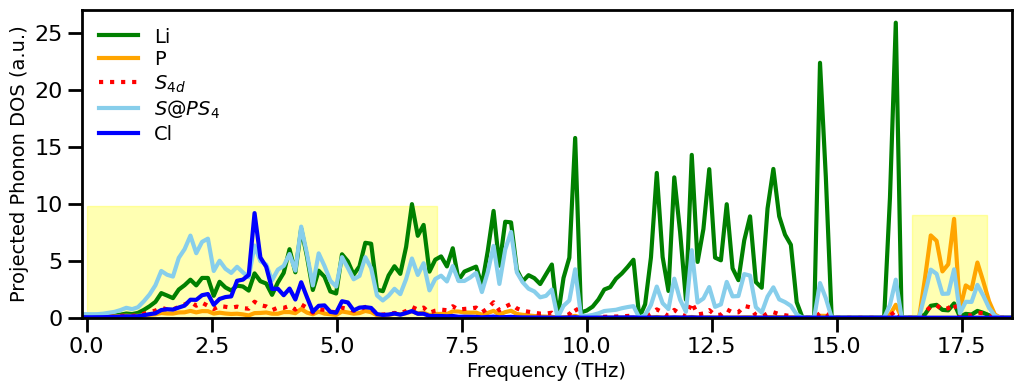

In [59]:
####Comboned PDOS plot for only single species taken fron different pdos files:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
# List of filenames containing total DOS data
plt.figure(figsize=(10, 6))
mpl.rcParams['axes.linewidth']=2
mpl.rcParams['axes.labelsize']=14
mpl.rcParams['axes.titlepad']=9
mpl.rcParams['axes.titleweight']='bold'
mpl.rcParams['axes.titlesize']=9
mpl.rcParams['lines.linewidth']=4
#mpl.rcParams['lines.markersize']=50
mpl.rcParams['xtick.major.width']=2
mpl.rcParams['xtick.major.size']=10
mpl.rcParams['ytick.major.width']=2
mpl.rcParams['ytick.major.size']=10
mpl.rcParams['xtick.labelsize'] = 16  # Adjust the fontsize value as needed
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['legend.fontsize']=14
mpl.rcParams['axes.linewidth'] = 2 #width of the frame
atom_groups = {'Li': list(range(1, 24)),'P': list(range(25, 28)), 'US': list(range(29, 32)), 'TS': list(range(33, 48)),'Cl': list(range(49, 52))}  # Define the atom indices for Li
file_names = ["/Users/swastika/Documents/research/LU-projects/argyrodites_mech/phonon/lpscl/lpscl/hseo6_mbdnl_light_3/phonopy/output/projected_dos.dat"]
custom_file_names = ["Li", "P", "S4d", "S@PS4", "Cl"]
p_colors = ['black']
#alpha_colors = [0, 0.1, 0.1]
# Initialize an array to store summed PDOS, matching the length of the frequency axis
summed_pdos = np.zeros(0)
plt.figure(figsize=(12,4))
for i, file_name in enumerate(file_names):
    data = np.loadtxt(file_name)
    li_dos = np.sum(data[:, atom_groups['Li']], axis=1)
    p_dos = np.sum(data[:, atom_groups['P']], axis=1)
    us_dos = np.sum(data[:, atom_groups['US']], axis=1)
    ts_dos = np.sum(data[:, atom_groups['TS']], axis=1)
    cl_dos = np.sum(data[:, atom_groups['Cl']], axis=1)
    if summed_pdos.shape[0] == 0:
        summed_pdos = li_dos
    else:
        summed_pdos += li_dos
    if i == 0:  # Change the index to the line you want to be dashed (0-based index)
        #plt.plot(data[:, 0], li_dos, label=custom_file_names[i], color="red", linewidth=15, linestyle='dashed')
        plt.plot(data[:, 0], li_dos, label="Li", color="green", linewidth=3)
        plt.plot(data[:, 0], p_dos, label="P", color="orange", linewidth=3)
        plt.plot(data[:, 0], us_dos, label="$S_{4c}$", color="red", linewidth=3,linestyle='dotted')
        plt.plot(data[:, 0], ts_dos, label="$S@PS_{4}$", color="skyblue", linewidth=3)
        plt.plot(data[:, 0], cl_dos, label="Cl", color="blue", linewidth=3)
    else:
        plt.plot(data[:, 0], projected_dos, label=custom_file_names[i], color=p_colors[i], linewidth=5)
    #plt.fill_between(data[:, 0], 0, projected_dos, color=p_colors[i], alpha=alpha_colors[i])
plt.xlim(-0.1, 18.5)
plt.ylim(0, 27)
plt.xlabel('Frequency (THz)', fontsize=14)
plt.ylabel('Projected Phonon DOS (a.u.)', fontsize=14)
plt.fill_between([0,7], y1=0, y2=9.8, interpolate=True, color='yellow', alpha=0.3)
plt.fill_between([16.5,18], y1=0, y2=9, interpolate=True, color='yellow', alpha=0.3)
#plt.title('Summed Projected DOS of P in Different Files')
plt.legend(labelspacing = 0.2,fancybox=False, framealpha=0.0)
plt.savefig('lpscl', dpi=450)
plt.show()

<Figure size 1000x600 with 0 Axes>

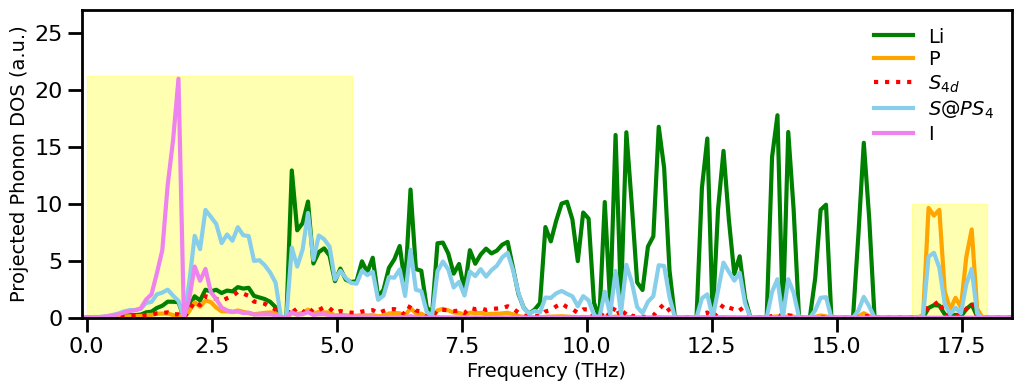

In [61]:
####Comboned PDOS plot for only single species taken fron different pdos files:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
# List of filenames containing total DOS data
plt.figure(figsize=(10, 6))
mpl.rcParams['axes.linewidth']=2
mpl.rcParams['axes.labelsize']=14
mpl.rcParams['axes.titlepad']=9
mpl.rcParams['axes.titleweight']='bold'
mpl.rcParams['axes.titlesize']=9
mpl.rcParams['lines.linewidth']=4
#mpl.rcParams['lines.markersize']=50
mpl.rcParams['xtick.major.width']=2
mpl.rcParams['xtick.major.size']=10
mpl.rcParams['ytick.major.width']=2
mpl.rcParams['ytick.major.size']=10
mpl.rcParams['xtick.labelsize'] = 16  # Adjust the fontsize value as needed
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['legend.fontsize']=14
mpl.rcParams['axes.linewidth'] = 2 #width of the frame
atom_groups = {'Li': list(range(1, 24)),'P': list(range(25, 28)), 'US': list(range(29, 32)), 'TS': list(range(33, 48)),'Cl': list(range(49, 52))}  # Define the atom indices for Li
file_names = ["/Users/swastika/Documents/research/LU-projects/argyrodites_mech/phonon/lpsi/hseo6_mbd_nl_121_sc/k-point-3/phonopy/output/projected_dos.dat"]
custom_file_names = ["Li", "P", "S4d", "S@PS4", "Cl"]
p_colors = ['black']
#alpha_colors = [0, 0.1, 0.1]
# Initialize an array to store summed PDOS, matching the length of the frequency axis
summed_pdos = np.zeros(0)
plt.figure(figsize=(12,4))
for i, file_name in enumerate(file_names):
    data = np.loadtxt(file_name)
    li_dos = np.sum(data[:, atom_groups['Li']], axis=1)
    p_dos = np.sum(data[:, atom_groups['P']], axis=1)
    us_dos = np.sum(data[:, atom_groups['US']], axis=1)
    ts_dos = np.sum(data[:, atom_groups['TS']], axis=1)
    cl_dos = np.sum(data[:, atom_groups['Cl']], axis=1)
    if summed_pdos.shape[0] == 0:
        summed_pdos = li_dos
    else:
        summed_pdos += li_dos
    if i == 0:  # Change the index to the line you want to be dashed (0-based index)
        #plt.plot(data[:, 0], li_dos, label=custom_file_names[i], color="red", linewidth=15, linestyle='dashed')
        plt.plot(data[:, 0], li_dos, label="Li", color="green", linewidth=3)
        plt.plot(data[:, 0], p_dos, label="P", color="orange", linewidth=3)
        plt.plot(data[:, 0], us_dos, label="$S_{4d}$", color="red", linewidth=3,linestyle='dotted')
        plt.plot(data[:, 0], ts_dos, label="$S@PS_{4}$", color="skyblue", linewidth=3)
        plt.plot(data[:, 0], cl_dos, label="I", color="violet", linewidth=3)
    else:
        plt.plot(data[:, 0], projected_dos, label=custom_file_names[i], color=p_colors[i], linewidth=5)
    #plt.fill_between(data[:, 0], 0, projected_dos, color=p_colors[i], alpha=alpha_colors[i])
plt.xlim(-0.1, 18.5)
plt.ylim(0, 27)
plt.xlabel('Frequency (THz)', fontsize=14)
plt.ylabel('Projected Phonon DOS (a.u.)', fontsize=14)
plt.fill_between([0,5.3], y1=0, y2=21.2, interpolate=True, color='yellow', alpha=0.3)
#plt.fill_between([5.9,8.6], y1=0, y2=11.5, interpolate=True, color='lime', alpha=0.3)
plt.fill_between([16.5,18], y1=0, y2=10, interpolate=True, color='yellow', alpha=0.3)

#plt.fill_between(0, 20, interpolate=True, color='salmon', alpha=0.3)
#plt.title('Summed Projected DOS of P in Different Files')
plt.legend(labelspacing = 0.2,fancybox=False, framealpha=0.0)
plt.savefig('lpsi', dpi=450)
plt.show()

<Figure size 1000x600 with 0 Axes>

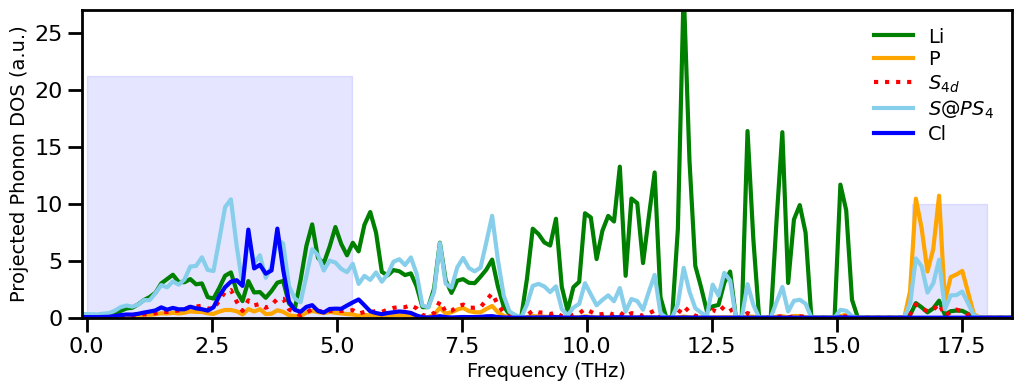

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
# List of filenames containing total DOS data
plt.figure(figsize=(10, 6))
mpl.rcParams['axes.linewidth']=2
mpl.rcParams['axes.labelsize']=14
mpl.rcParams['axes.titlepad']=9
mpl.rcParams['axes.titleweight']='bold'
mpl.rcParams['axes.titlesize']=9
mpl.rcParams['lines.linewidth']=4
#mpl.rcParams['lines.markersize']=50
mpl.rcParams['xtick.major.width']=2
mpl.rcParams['xtick.major.size']=10
mpl.rcParams['ytick.major.width']=2
mpl.rcParams['ytick.major.size']=10
mpl.rcParams['xtick.labelsize'] = 16  # Adjust the fontsize value as needed
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['legend.fontsize']=14
mpl.rcParams['axes.linewidth'] = 2 #width of the frame
atom_groups = {'Li': list(range(1, 24)),'P': list(range(25, 28)), 'US': list(range(29, 32)), 'TS': list(range(33, 48)),'Cl': list(range(49, 52))}  # Define the atom indices for Li
#path: /Users/swastika/Documents/research/LU-projects/argyrodites_mech/phonon/lpsi/hseo6_ts_121_sc/correct/phonopy/output/projected_dos.dat
#/Users/swastika/Documents/research/LU-projects/argyrodites_mech/phonon/lpsi/hseo6_121_sc/121/phonopy/output/projected_dos.dat
# /Users/swastika/Documents/research/LU-projects/argyrodites_mech/phonon/lpscl/lpscl/hseo6/phonopy/output/projected_dos.dat
# /Users/swastika/Documents/research/LU-projects/argyrodites_mech/phonon/lpscl/lpscl/hseo6_ts/phonopy/output/projected_dos.dat
# /Users/swastika/Documents/research/LU-projects/argyrodites_mech/phonon/lpscl/lpscl/hseo6_mbdnl_light_3/phonopy/output/projected_dos.dat
file_names = ["/Users/swastika/Documents/research/LU-projects/argyrodites_mech/phonon/lpscl/lpscl/hseo6/phonopy/output/projected_dos.dat"]
custom_file_names = ["Li", "P", "S4d", "S@PS4", "Cl"]
p_colors = ['black']
#alpha_colors = [0, 0.1, 0.1]
# Initialize an array to store summed PDOS, matching the length of the frequency axis
summed_pdos = np.zeros(0)
plt.figure(figsize=(12,4))
for i, file_name in enumerate(file_names):
    data = np.loadtxt(file_name)
    li_dos = np.sum(data[:, atom_groups['Li']], axis=1)
    p_dos = np.sum(data[:, atom_groups['P']], axis=1)
    us_dos = np.sum(data[:, atom_groups['US']], axis=1)
    ts_dos = np.sum(data[:, atom_groups['TS']], axis=1)
    cl_dos = np.sum(data[:, atom_groups['Cl']], axis=1)
    if summed_pdos.shape[0] == 0:
        summed_pdos = li_dos
    else:
        summed_pdos += li_dos
    if i == 0:  # Change the index to the line you want to be dashed (0-based index)
        #plt.plot(data[:, 0], li_dos, label=custom_file_names[i], color="red", linewidth=15, linestyle='dashed')
        plt.plot(data[:, 0], li_dos, label="Li", color="green", linewidth=3)
        plt.plot(data[:, 0], p_dos, label="P", color="orange", linewidth=3)
        plt.plot(data[:, 0], us_dos, label="$S_{4d}$", color="red", linewidth=3,linestyle='dotted')
        plt.plot(data[:, 0], ts_dos, label="$S@PS_{4}$", color="skyblue", linewidth=3)
        plt.plot(data[:, 0], cl_dos, label="Cl", color="blue", linewidth=3)
    else:
        plt.plot(data[:, 0], projected_dos, label=custom_file_names[i], color=p_colors[i], linewidth=5)
    #plt.fill_between(data[:, 0], 0, projected_dos, color=p_colors[i], alpha=alpha_colors[i])
plt.xlim(-0.1, 18.5)
plt.ylim(0, 27)
plt.xlabel('Frequency (THz)', fontsize=14)
plt.ylabel('Projected Phonon DOS (a.u.)', fontsize=14)
plt.fill_between([0,5.3], y1=0, y2=21.2, interpolate=True, color='blue', alpha=0.1)
#plt.fill_between([5.9,8.6], y1=0, y2=11.5, interpolate=True, color='lime', alpha=0.1)
plt.fill_between([16.5,18], y1=0, y2=10, interpolate=True, color='blue', alpha=0.1)

#plt.fill_between(0, 20, interpolate=True, color='salmon', alpha=0.3)
#plt.title('Summed Projected DOS of P in Different Files')
plt.legend(labelspacing = 0.2,fancybox=False, framealpha=0.0)
plt.savefig('lpscl-hse', dpi=450)
plt.show()

<Figure size 10000x6000 with 0 Axes>

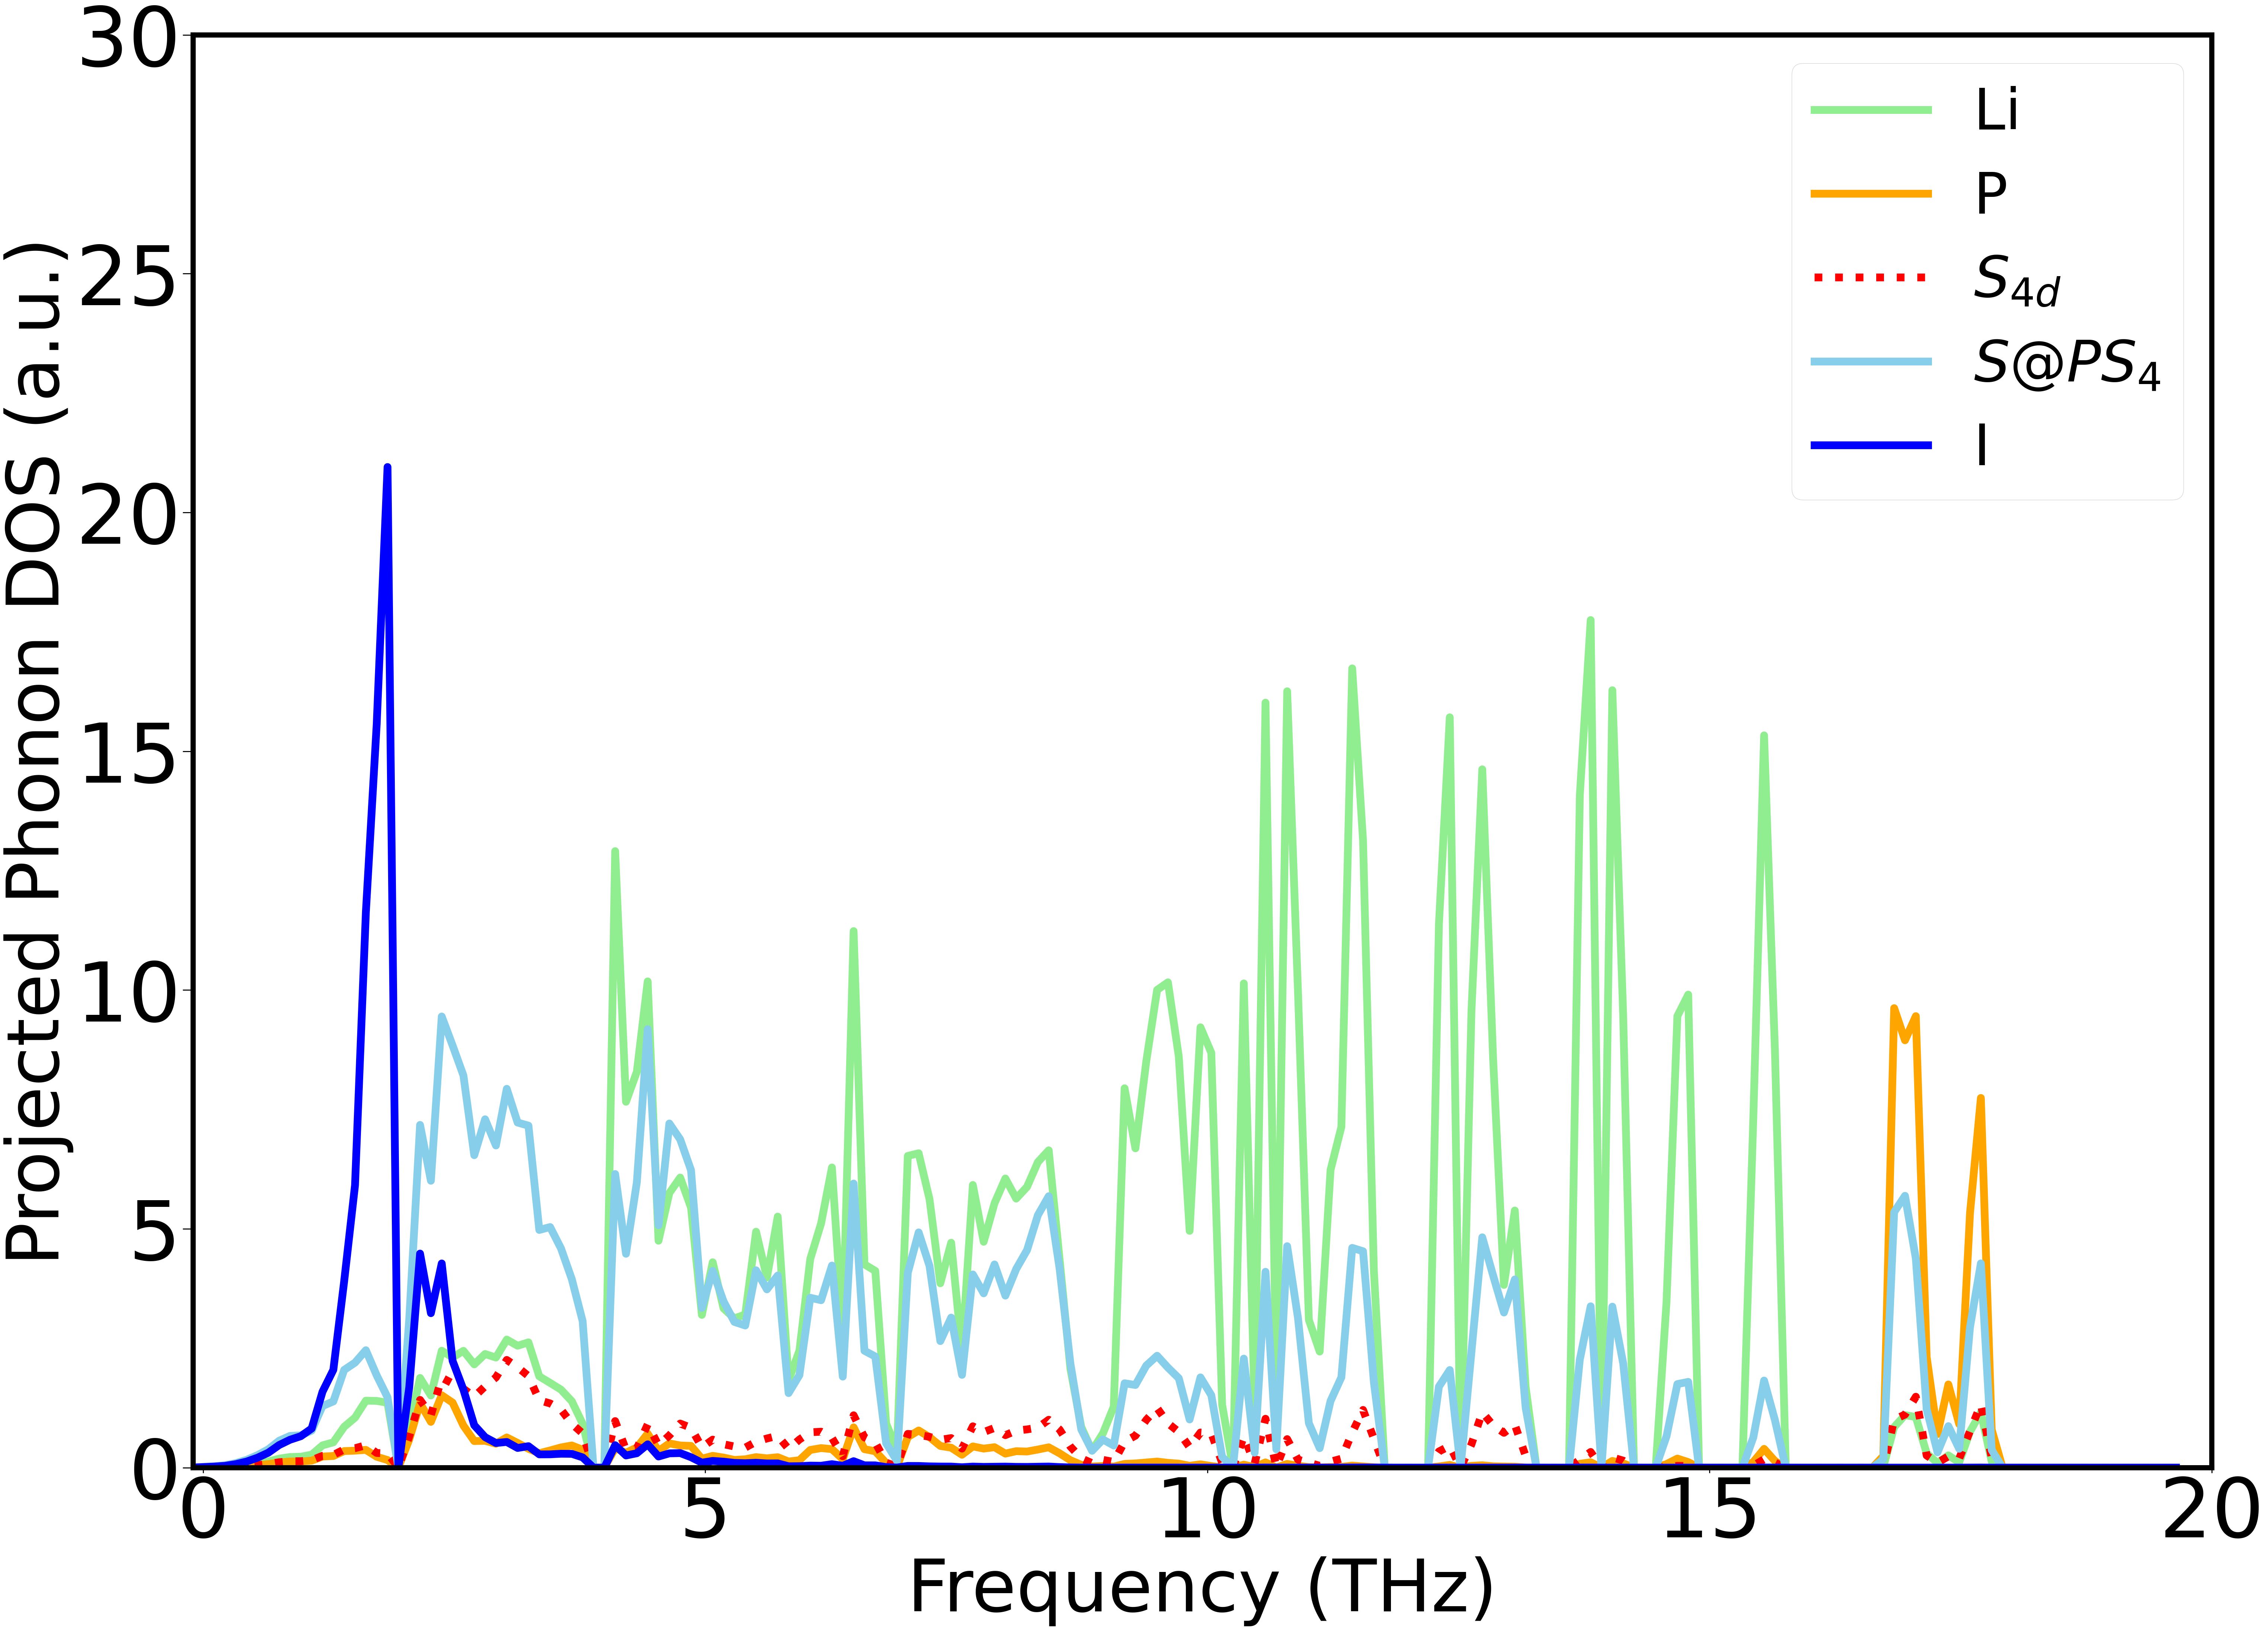

In [51]:
####Comboned PDOS plot for only single species taken fron different pdos files:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
# List of filenames containing total DOS data
plt.figure(figsize=(100, 60))
mpl.rcParams['axes.linewidth']=4
mpl.rcParams['axes.labelsize']=140
mpl.rcParams['axes.titlepad']=90
mpl.rcParams['axes.titleweight']='bold'
mpl.rcParams['axes.titlesize']=90
mpl.rcParams['lines.linewidth']=8
#mpl.rcParams['lines.markersize']=50
mpl.rcParams['xtick.major.width']=2
mpl.rcParams['xtick.major.size']=10
mpl.rcParams['ytick.major.width']=2
mpl.rcParams['ytick.major.size']=20
mpl.rcParams['xtick.labelsize'] = 160  # Adjust the fontsize value as needed
mpl.rcParams['ytick.labelsize'] = 160
mpl.rcParams['legend.fontsize']=110
mpl.rcParams['axes.linewidth'] = 10
atom_groups = {'Li': list(range(1, 24)),'P': list(range(25, 28)), 'US': list(range(29, 32)), 'TS': list(range(33, 48)),'Cl': list(range(49, 52))}  # Define the atom indices for Li
file_names = ["/Users/swastika/Documents/research/LU-projects/argyrodites_mech/phonon/lpsi/hseo6_mbd_nl_121_sc/k-point-3/phonopy/output/projected_dos.dat"]
custom_file_names = ["Li", "P", "S4d", "S@PS4", "Cl"]
p_colors = ['black']
#alpha_colors = [0, 0.1, 0.1]
# Initialize an array to store summed PDOS, matching the length of the frequency axis
summed_pdos = np.zeros(0)
plt.figure(figsize=(70,50))
for i, file_name in enumerate(file_names):
    data = np.loadtxt(file_name)
    li_dos = np.sum(data[:, atom_groups['Li']], axis=1)
    p_dos = np.sum(data[:, atom_groups['P']], axis=1)
    us_dos = np.sum(data[:, atom_groups['US']], axis=1)
    ts_dos = np.sum(data[:, atom_groups['TS']], axis=1)
    cl_dos = np.sum(data[:, atom_groups['Cl']], axis=1)
    if summed_pdos.shape[0] == 0:
        summed_pdos = li_dos
    else:
        summed_pdos += li_dos
    if i == 0:  # Change the index to the line you want to be dashed (0-based index)
        #plt.plot(data[:, 0], li_dos, label=custom_file_names[i], color="red", linewidth=15, linestyle='dashed')
        plt.plot(data[:, 0], li_dos, label="Li", color="lightgreen", linewidth=15)
        plt.plot(data[:, 0], p_dos, label="P", color="orange", linewidth=15)
        plt.plot(data[:, 0], us_dos, label="$S_{4d}$", color="red", linewidth=15,linestyle='dotted')
        plt.plot(data[:, 0], ts_dos, label="$S@PS_{4}$", color="skyblue", linewidth=15)
        plt.plot(data[:, 0], cl_dos, label="I", color="blue", linewidth=15)
    else:
        plt.plot(data[:, 0], projected_dos, label=custom_file_names[i], color=p_colors[i], linewidth=25)
    #plt.fill_between(data[:, 0], 0, projected_dos, color=p_colors[i], alpha=alpha_colors[i])
plt.xlim(-0.1, 20)
plt.ylim(0, 30)
plt.xlabel('Frequency (THz)', fontsize=140)
plt.ylabel('Projected Phonon DOS (a.u.)', fontsize=140)
#plt.title('Summed Projected DOS of P in Different Files')
plt.legend()
plt.savefig('lpsi', dpi=450)
plt.show()

In [ ]:
####Comboned PDOS plot for only single species taken fron different pdos files:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
# List of filenames containing total DOS data
plt.figure(figsize=(100, 60))
mpl.rcParams['axes.linewidth']=4
mpl.rcParams['axes.labelsize']=140
mpl.rcParams['axes.titlepad']=90
mpl.rcParams['axes.titleweight']='bold'
mpl.rcParams['axes.titlesize']=90
mpl.rcParams['lines.linewidth']=8
#mpl.rcParams['lines.markersize']=50
mpl.rcParams['xtick.major.width']=2
mpl.rcParams['xtick.major.size']=10
mpl.rcParams['ytick.major.width']=2
mpl.rcParams['ytick.major.size']=20
mpl.rcParams['xtick.labelsize'] = 160  # Adjust the fontsize value as needed
mpl.rcParams['ytick.labelsize'] = 160
mpl.rcParams['legend.fontsize']=110
mpl.rcParams['axes.linewidth'] = 10
atom_groups = {'Li': list(range(1, 24)),'P': list(range(25, 28)), 'US': list(range(29, 32)), 'TS': list(range(33, 48)),'Cl': list(range(49, 52))}  # Define the atom indices for Li
file_names = ["/Users/swastika/Documents/research/LU-projects/argyrodites_mech/phonon/lpsi/hseo6_mbd_nl_121_sc/k-point-3/phonopy/output/projected_dos.dat"]
custom_file_names = ["Li", "P", "S4d", "S@PS4", "Cl"]
p_colors = ['black']
#alpha_colors = [0, 0.1, 0.1]
# Initialize an array to store summed PDOS, matching the length of the frequency axis
summed_pdos = np.zeros(0)
plt.figure(figsize=(70,50))
for i, file_name in enumerate(file_names):
    data = np.loadtxt(file_name)
    li_dos = np.sum(data[:, atom_groups['Li']], axis=1)
    p_dos = np.sum(data[:, atom_groups['P']], axis=1)
    us_dos = np.sum(data[:, atom_groups['US']], axis=1)
    ts_dos = np.sum(data[:, atom_groups['TS']], axis=1)
    cl_dos = np.sum(data[:, atom_groups['Cl']], axis=1)
    if summed_pdos.shape[0] == 0:
        summed_pdos = li_dos
    else:
        summed_pdos += li_dos
    if i == 0:  # Change the index to the line you want to be dashed (0-based index)
        #plt.plot(data[:, 0], li_dos, label=custom_file_names[i], color="red", linewidth=15, linestyle='dashed')
        plt.plot(data[:, 0], li_dos, label="Li", color="lightgreen", linewidth=15)
        plt.plot(data[:, 0], p_dos, label="P", color="orange", linewidth=15)
        plt.plot(data[:, 0], us_dos, label="$S_{4d}$", color="red", linewidth=15,linestyle='dotted')
        plt.plot(data[:, 0], ts_dos, label="$S@PS_{4}$", color="skyblue", linewidth=15)
        plt.plot(data[:, 0], cl_dos, label="I", color="blue", linewidth=15)
    else:
        plt.plot(data[:, 0], projected_dos, label=custom_file_names[i], color=p_colors[i], linewidth=25)
    #plt.fill_between(data[:, 0], 0, projected_dos, color=p_colors[i], alpha=alpha_colors[i])
plt.xlim(-0.1, 20)
plt.ylim(0, 30)
plt.xlabel('Frequency (THz)', fontsize=140)
plt.ylabel('Projected Phonon DOS (a.u.)', fontsize=140)
#plt.title('Summed Projected DOS of P in Different Files')
plt.legend()
plt.savefig('lpsi', dpi=450)
plt.show()